Read raw data with zone(from kmeans clustering result)
===

In [1]:
import time
import os
import numpy as np
import seaborn as sns
import matplotlib
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
from PIL import Image
from keras.utils import np_utils#
from numpy import genfromtxt
#from learning_model import *
from sklearn.metrics import mean_squared_error
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
%matplotlib inline

Using TensorFlow backend.
/usr/local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [74]:
train_part_test = np.genfromtxt('./zone_result/set33_noleft_cluster.csv', delimiter=',')
pixel_pos = np.genfromtxt('./src/pixel_pos.csv', delimiter=',')
print (train_part_test)
#print (pixel_pos[1:,:])

[[  49.1785     23.5765     38.        -89.866879    8.      ]
 [  49.5745     20.4835     38.        -75.410881    3.      ]
 [  49.6675     14.7895     38.        -77.682243    3.      ]
 [  49.726      12.4165     38.        -89.866879    3.      ]
 [  49.7545     18.226      38.        -75.410881    3.      ]
 [  49.9465     16.4425     38.        -76.638889    3.      ]
 [  51.7885     23.629      38.        -86.154357    8.      ]
 [  52.102      12.5935     38.        -82.891244    3.      ]
 [  52.1275     18.2845     38.        -75.129018    3.      ]
 [  52.15       14.4895     38.        -80.948936    3.      ]
 [  52.1845     20.536      38.        -84.123554    8.      ]
 [  52.201      16.504      38.        -76.746606    3.      ]
 [  53.8405     20.3755     38.        -81.293162    3.      ]
 [  53.9785     16.459      38.        -83.513699    3.      ]
 [  54.1075     12.187      38.        -86.393529    3.      ]
 [  54.148      18.4705     38.        -76.775127    3.

PCI training
===

[41. 38. 39. 39. 41. 42. 39. 41. 38. 41. 38. 42. 41. 40. 39. 39. 40. 41.]
18
n_accuracy_pci== 16
len(pci_pred)== 18
pci accuracy:  0.8888888888888888


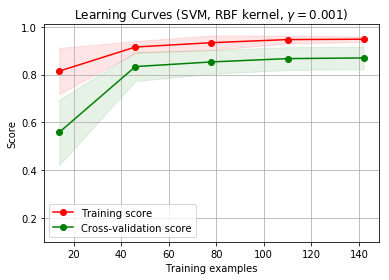

In [30]:
X = train_part_test[:,0:2]
y = train_part_test[:,2]
#y = np_utils.to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
#print(X_train)
modelClassifier = KNeighborsClassifier(n_neighbors=3)
#modelClassifier = DecisionTreeClassifier()
#modelClassifier = MLPClassifier(solver='adam', alpha=1e-5,
#                                hidden_layer_sizes=(100, 1), random_state=1)
#
'''
modelClassifier = Sequential()
modelClassifier.add(Dense(128, activation='relu', input_dim = 2))
modelClassifier.add(Dense(128, activation='relu'))
modelClassifier.add(Dense(128, activation='relu'))
modelClassifier.add(Dense(128, activation='relu'))
modelClassifier.add(Dense(1,activation='relu'))
modelClassifier.compile(loss='mean_squared_error', optimizer='adam')
modelClassifier.fit(X_train, y_train, nb_epoch=nb_epoch, batch_size=16, shuffle=True)
'''
modelClassifier.fit(X_train, y_train)
y_pred = modelClassifier.predict(X_test)
print(y_pred)
print(len(y_pred))
#print(y_test)
#print(len(y_test))
n_accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]: 
        n_accuracy = n_accuracy+1
print ("n_accuracy_pci==",n_accuracy)
print ("len(pci_pred)==",len(y_pred))
acc = n_accuracy/(len(y_pred))
print('pci accuracy: ',acc )
plot_learning_curve(modelClassifier, title, X, y, ylim=(0.1, 1.01),cv=cv, n_jobs=4)
plt.show()

Predict pci and plot pci map
===

In [6]:
def convert_location_data(x, y) :
    '''
    lng = a * x1 - b * y2 + c 
    lat = a * x2 + b * y1 + d

    NEMO -> indoor position value
    (840, -351) -> (96.824, 0)
    (923, -179) -> (107.068, 15.874)
    '''
    a = 0.1185
    b = -0.003
    c = -1.81
    d = 39.842
    
    lng = a * x - b * y * (-1) + c - 4
    lat = a * y * (-1) + b * x + d - 0.5
    
    
    return lng, lat

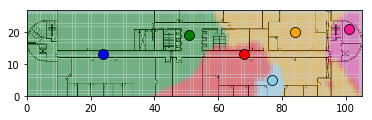

In [23]:
map_size = [105, 27]
x_resolution = map_size[0]
y_resolution = map_size[1]
output = modelClassifier.predict(pixel_pos[1:,:])
#print(output)
#np.savetxt('output.csv', output, delimiter=',', fmt='%f')
pci = []
pci_input =  [37, 38, 39, 40, 41, 42, 120, 151, 154, 1, 62]
pci_config = np.array(pci_input)
f = open('./result_pci/pci_result.csv', 'w') #write the pci result into file
f.write('x,y,pci,\n')
#z = np.reshape(output, (y_resolution, x_resolution))
#z[:] = map(list,zip(*z[::-1]))
#z = np.genfromtxt('z.csv', delimiter=',')
#z_pred = np.hstack((xy, pci_map_pred))
#pci_pred = output.reshape(27,105)
z = np.reshape(output, (y_resolution, x_resolution))
#np.savetxt('z.csv', z, delimiter=',', fmt='%f')
for j in range(y_resolution):
        for i in range(x_resolution) : 
            pci = z[j][i]
            if pci == 37 :#37
                #pci_real = pci_config[0] 
                plt.plot(round(i), round(j), color='blue', marker = 's', markersize=5, alpha=.1)
            elif pci == 38 :#38
                #pci_real = pci_config[1]
                plt.plot(round(i), round(j), color='green', marker = 's', markersize=5, alpha=.1 )
            elif pci == 39 :#39
                #pci_real = pci_config[2]
                plt.plot(round(i), round(j), color='red', marker = 's', markersize=5, alpha=.1 )
            elif pci == 40:#40
                #pci_real = pci_config[3]
                plt.plot(round(i), round(j), color='skyblue', marker = 's', markersize=5, alpha=.1)
            elif pci == 41:#41
                #pci_real = pci_config[4]
                plt.plot(round(i), round(j), color='orange', marker = 's', markersize=5, alpha=.1)
            elif pci == 42:#42
                #pci_real = pci_config[5]
                plt.plot(round(i), round(j), color='deeppink', marker = 's', markersize=5, alpha=.1)
            elif pci == 120:#120
                #pci_real = pci_config[6]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            elif pci == 151:#151
                #pci_real = pci_config[7]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            elif pci == 154:#154
                #pci_real = pci_config[8]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            else :                 
                pci_real = -1
                plt.plot(round(i), round(j), color='white', marker = 's', markersize=5, alpha=.1 )
            result = str(i) + ',' + str(j) + ',' + str(pci) +',' + '\n'
            f.write(result)  # python will convert \n to os.linesep

f.close()  # you can omit in most cases as the destructor will call it
img = plt.imread("./pic/51_5F-3.png")
plt.imshow(img, zorder=0, extent=[0, map_size[0], 0, map_size[1]])
x, y = convert_location_data (260,215) #37
plt.plot(round(abs(x)), round(abs(y)), color='blue', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)

#SC1 (199, 151)
#x, y = convert_location_data (199, 868)
x, y = convert_location_data (480, 158) #38
plt.plot(round(abs(x)), round(abs(y)), color='green', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (630, 210) #39
plt.plot(round(abs(x)), round(abs(y)), color='red', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
#plt.plot(round(abs(x)), round(abs(y)), color='purple', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (710, 275) #40
plt.plot(round(abs(x)), round(abs(y)), color='skyblue', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (765, 145) #41
plt.plot(round(abs(x)), round(abs(y)), color='orange', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
#plt.plot(round(abs(x)), round(abs(y)), color='red', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)

x, y = convert_location_data (908, 130) #42
plt.plot(round(abs(x)), round(abs(y)), color='deeppink', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
plt.savefig('test', dpi=200)

Generate all points with pci and zone
===

In [75]:
pci_result_zone = np.genfromtxt('./result_pci/pci_result.csv', delimiter=',')
#print (pci_result_zone)
for i in range(len(pci_result_zone)):
    pci_result_zone[:,3] = "0" 
print (pci_result_zone)
pci_result_zone_pd = pd.DataFrame(pci_result_zone,columns=['x','y','pci','zone'])
pci_result_zone_pd = pci_result_zone_pd.drop(pci_result_zone_pd.index[0])
pci_result_zone_pd.to_csv('./result_pci/pci_result_zone_pd.csv')
print (pci_result_zone_pd)
train_part_test[:,0] = np.around(train_part_test[:,0])
train_part_test[:,1] = np.around(train_part_test[:,1])
#print (train_part_test)
train_part_test_pd = pd.DataFrame(train_part_test,columns=['x','y','pci','rsrp','zone'])
#print (train_part_test_pd)

[[ nan  nan  nan   0.]
 [  0.   0.  38.   0.]
 [  1.   0.  38.   0.]
 ...
 [102.  26.  42.   0.]
 [103.  26.  42.   0.]
 [104.  26.  42.   0.]]
          x     y   pci  zone
1       0.0   0.0  38.0   0.0
2       1.0   0.0  38.0   0.0
3       2.0   0.0  38.0   0.0
4       3.0   0.0  38.0   0.0
5       4.0   0.0  38.0   0.0
6       5.0   0.0  38.0   0.0
7       6.0   0.0  38.0   0.0
8       7.0   0.0  38.0   0.0
9       8.0   0.0  38.0   0.0
10      9.0   0.0  38.0   0.0
11     10.0   0.0  38.0   0.0
12     11.0   0.0  38.0   0.0
13     12.0   0.0  38.0   0.0
14     13.0   0.0  38.0   0.0
15     14.0   0.0  38.0   0.0
16     15.0   0.0  38.0   0.0
17     16.0   0.0  38.0   0.0
18     17.0   0.0  38.0   0.0
19     18.0   0.0  38.0   0.0
20     19.0   0.0  38.0   0.0
21     20.0   0.0  38.0   0.0
22     21.0   0.0  38.0   0.0
23     22.0   0.0  38.0   0.0
24     23.0   0.0  38.0   0.0
25     24.0   0.0  38.0   0.0
26     25.0   0.0  38.0   0.0
27     26.0   0.0  38.0   0.0
28     27.0   0.

Merge raw data zone and use KNN to predict points zone without real data
===

In [81]:
#print(train_part_test)
#df_dul = np.delete(train_part_test,[2,3],axis=1)
df_dul_pd = pd.DataFrame(train_part_test,columns=['x','y','pci','rsrp','zone'])
df_dul_pd_train = pd.DataFrame(df_dul_pd,columns=['x','y','zone','pci','rsrp'])
print(df_dul_pd_train)
#df_dul_np = df_dul.values
df_dul_np = df_dul_pd_train.values
print(df_dul_np)
np.savetxt('./result_pci/df_dul_np_result.csv', df_dul_np, delimiter=',', fmt='%f')
X = df_dul_np[:result,0:2]
y = df_dul_np[:result,2]
print(X)
print(y)
modelClassifier = KNeighborsClassifier(n_neighbors=3)
#modelClassifier = DecisionTreeClassifier()
#modelClassifier = MLPClassifier()
#modelClassifier = SVC(kernel='poly', probability=True)
pci_pred = modelClassifier.fit(X, y).predict(df_dul_np[result:,0:2])
print(pci_pred)
print("===")
#print(type(pci_pred))
#print("len(pci_pred)==",len(pci_pred))
print(df_dul_np)
for i in range(len(pci_pred)):
    df_dul_np[result+i:,2] = pci_pred[i]
print (len(pci_pred))
print (df_dul_np)
np.savetxt('./result_pci/zone_knn_result.csv', pci_pred, delimiter=',', fmt='%f')
print (df_dul_np)
#np pci test
#df_dul_sort_pd = pd.DataFrame(df_dul_np,columns=['x','y','pci','zone'])
df_dul_sort_pd = pd.DataFrame(df_dul_np,columns=['x','y','zone','pci','rsrp'])
print(type(df_dul_sort_pd))
print (df_dul_sort_pd)
df_dul_sort = df_dul_sort_pd.sort_values(by=['y','x','pci','rsrp'])
print(type(df_dul_sort))
#print (df_dul_sort.tail())
df_dul_sort.to_csv('./result_pci/zone_knn_result_sort_pd.csv')

#print (df_dul_sort)

         x     y  zone   pci        rsrp
0     49.0  24.0   8.0  38.0  -89.866879
1     50.0  20.0   3.0  38.0  -75.410881
2     50.0  15.0   3.0  38.0  -77.682243
3     50.0  12.0   3.0  38.0  -89.866879
4     50.0  18.0   3.0  38.0  -75.410881
5     50.0  16.0   3.0  38.0  -76.638889
6     52.0  24.0   8.0  38.0  -86.154357
7     52.0  13.0   3.0  38.0  -82.891244
8     52.0  18.0   3.0  38.0  -75.129018
9     52.0  14.0   3.0  38.0  -80.948936
10    52.0  21.0   8.0  38.0  -84.123554
11    52.0  17.0   3.0  38.0  -76.746606
12    54.0  20.0   3.0  38.0  -81.293162
13    54.0  16.0   3.0  38.0  -83.513699
14    54.0  12.0   3.0  38.0  -86.393529
15    54.0  18.0   3.0  38.0  -76.775127
16    54.0  15.0   3.0  38.0  -79.323158
17    55.0  23.0   8.0  38.0  -94.934746
18    56.0  12.0   6.0  39.0  -87.468382
19    56.0  21.0   8.0  38.0 -107.000000
20    57.0   9.0  13.0  39.0 -119.400000
21    57.0   3.0  13.0  39.0 -104.857143
22    57.0  12.0   6.0  39.0  -87.148047
23    57.0   1.0

In [82]:
#print(train_part_test)
train_part_test_pd = pd.DataFrame(train_part_test,columns=['x','y','pci','rsrp','zone'])
df = train_part_test_pd.append(pci_result_zone_pd)
#print("len(df)==",len(df))
#df = train_part_test_pd.loc[train_part_test_pd['x'].isin(pci_result_zone_pd['x']) & train_part_test_pd['y'].isin(pci_result_zone_pd['y'])]
#df1 = pci_result_zone_pd.loc[pci_result_zone_pd['x'].isin(train_part_test_pd['x']) & pci_result_zone_pd['y'].isin(train_part_test_pd['y'])]
#df = train_part_test_pd.loc[(train_part_test_pd['x'] != pci_result_zone_pd['x']) & (train_part_test_pd['y'] != pci_result_zone_pd['y'])]
#print("df==",df)
df = df[['x', 'y', 'pci', 'zone','rsrp']]
#print("df==",df)
np.savetxt('./result_rsrp/zone_beforemerge.csv', df, delimiter=',', fmt='%f')
df_no_rsrp = df.drop(['rsrp'],axis=1)
#no pci test
df_no_rsrp_nopci = df.drop(['pci'],axis=1)
#print(df_no_rsrp)
print(len(df_no_rsrp))
df_dul = df_no_rsrp_nopci.drop_duplicates(subset=['x', 'y'], keep='first', inplace=False)
print(len(df_dul))
#print(df_dul)
#df_dul = df_dul[['x','y','pci','zone']]
df_dul = df_dul[['x','y','zone']]
np.savetxt('./result_rsrp/zone_aftermerge.csv', df_dul, delimiter=',', fmt='%f')
#df_dul_number = pd.DataFrame(df_dul,columns=['x','y','pci','zone'])
df_dul_number = pd.DataFrame(df_dul,columns=['x','y','zone'])
#print(df_dul_number)
number = 0

for a in range(len(df_dul_number)):
    if(df_dul_number.iloc[a,2] == 0):
        number = number+1
#print(number)
result = (len(df_dul_number))-number
print(result)
#df = df.drop(['Unnamed: 0'],axis=1)
#df.to_csv('zone_compare1_nosort.csv')
#print(len(df))
#df_sort = df_dul.sort_values(by=['y','x'])
#df_sort.to_csv('./result_pci/zone_handle.csv')
#print("len(df_sort)==",len(df_sort))


/usr/local/lib/python3.5/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


3015
2835
178


In [83]:
map_size = [105, 27]
x_resolution = map_size[0]
y_resolution = map_size[1]
#no pci test
#data_plot = (df_dul_sort.values[:,3]).reshape(27, 105)
data_plot = (df_dul_sort.values[:,2]).reshape(27, 105)
print(df_dul_sort)
img = plt.imread("./pic/51_5F-3.png")
print(data_plot)

plt.imshow(img, zorder=0, extent=[0, map_size[0], 0, map_size[1]])
heatmap_rsrp = plt.pcolor(data_plot,cmap='jet',alpha=1)
plt.colorbar(ticks=range(16))

ValueError: cannot reshape array of size 180 into shape (27,105)

Draw learning curve
===

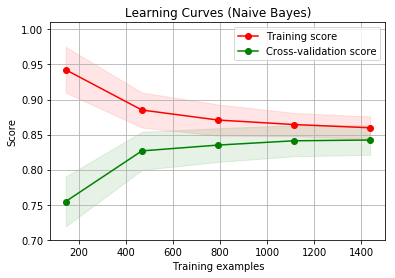

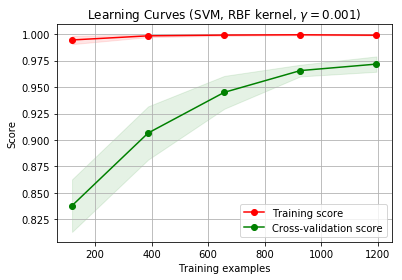

In [4]:
#def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
#                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
def plot_learning_curve(estimator, title, X, y, ylim=None,n_jobs=None, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target
#print("X==",X[0:2])
#print("y==",y[:])
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y)

plt.show()


Get raw data rsrp and do rsrp training
===

In [57]:
#::train_part_test is raw data
print(train_part_test)
#::df_dul_sort is knn result for every point
print(df_dul_sort.values)

[[  49.         24.         38.        -85.338039    4.      ]
 [  50.         15.         38.        -79.72        9.      ]
 [  50.         20.         38.        -79.552593   12.      ]
 [  50.         17.         38.        -75.01063    12.      ]
 [  50.         13.         38.        -80.438722    9.      ]
 [  50.         18.         38.        -65.92554    12.      ]
 [  52.         18.         38.        -69.382677   12.      ]
 [  52.         24.         38.        -87.356126    4.      ]
 [  52.         12.         38.        -80.14        9.      ]
 [  52.         15.         38.        -78.771429    9.      ]
 [  52.         21.         38.        -83.96378    12.      ]
 [  52.         17.         38.        -72.331452   12.      ]
 [  54.         12.         38.        -79.185827    9.      ]
 [  54.         20.         38.        -78.621912   12.      ]
 [  54.         18.         38.        -77.214607   12.      ]
 [  54.         17.         38.        -75.864173   12.

Delete mutiple training result list
===

In [53]:
rmse_list=[]

In [54]:
os.remove('./zone_result/zone_predict_total.csv')
print("zone_predict_total has been Removed!")

zone_predict_total has been Removed!


Start Rsrp training
===

In [114]:
print(train_part_test)

[[  49.         24.         38.        -98.284298    6.      ]
 [  50.         15.         38.        -91.045       4.      ]
 [  50.         18.         38.        -85.764894    4.      ]
 [  50.         21.         38.        -94.336434    6.      ]
 [  50.         13.         39.        -89.753535    4.      ]
 [  50.         17.         38.        -85.795495    4.      ]
 [  52.         19.         38.        -84.307767    4.      ]
 [  52.         24.         38.       -101.438095    6.      ]
 [  52.         13.         39.        -87.716964    4.      ]
 [  52.         15.         39.        -96.723529    4.      ]
 [  52.         21.         38.        -96.656757    6.      ]
 [  52.         17.         38.        -90.020513    4.      ]
 [  54.         21.         38.        -93.928235    6.      ]
 [  54.         16.         38.        -90.312676    4.      ]
 [  54.         18.         38.        -94.347887    6.      ]
 [  54.         15.         38.        -91.526923    4.

In [62]:
print(df_dul_sort.values)

[[  0.   0.   3.]
 [  1.   0.   3.]
 [  2.   0.   3.]
 ...
 [102.  26.  10.]
 [103.  26.  10.]
 [104.  26.  10.]]


In [60]:
start = time.time()
for a in range(100):
    for i in range(1,16):
        print(i)
        zone = np.array([])
        zone = np.where(train_part_test[:,4] == i)
        #zone = np.where(X_sparse_total[:,7] == i)
        #print(train_part_test[zone[0],:])
        print("zone == ",zone[0])
        #X = train_part_test[zone[0],0:3]
        #y = train_part_test[zone[0],3]      
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
        #print(X_train)
        model = KNeighborsRegressor(n_neighbors=3,weights='uniform')
        #model = DecisionTreeRegressor()
        #model = RandomForestRegressor()
        #model = GradientBoostingRegressor()
        #model = MLPRegressor(solver='lbfgs', alpha=1e-5,
        #                         hidden_layer_sizes=(100,), random_state=1) 
        #model = SVR(kernel='linear', C=1e3)
        #scores = cross_val_score(model, X, y, cv=5)
        #print("scores == ",scores)
        #print("scores.mean() == ",scores.mean())
        model.fit(X_train, y_train)    
        #print(model)
        filename = 'finalized_model_' + str(i) +'-' + '.sav'
        pickle.dump(model, open(filename, 'wb'))
        y_pred = model.predict(X_test)
    
        #print(df_dul_sort.values[zone_allpoint[0],0:3])
        #np pci test
        #zone_allpoint = np.where(df_dul_sort.values[:,3] == i)
        print(df_dul_sort)
        zone_allpoint = np.where(df_dul_sort.values[:,2] == i)
        print (len(df_dul_sort.values))
        #print (df_dul_sort.values)
        print (zone_allpoint)
        #print(df_dul_sort.values[zone_allpoint[0],0:3])
        #predict_zone = model.predict(df_dul_sort.values[zone_allpoint[0],0:3])
        predict_zone = model.predict(df_dul_sort.values[zone_allpoint[0],0:2])
    #print(zone_allpoint[0]+1)
        print(len(predict_zone))
        print("weight == ",len(predict_zone)/len(df_dul_sort.values))
    #predict_zone_every = np.append(pci_result_zone[zone_allpoint[0],0:3],predict_zone)
        name = './zone_result/zone_predict_' + str(i) +'.csv'
        #df_loc = pd.DataFrame(df_dul_sort.values[zone_allpoint[0],0:3],columns=['x','y','pci'])
        df_loc = pd.DataFrame(df_dul_sort.values[zone_allpoint[0],0:3],columns=['x','y','pci'])
        df_rsrp = pd.DataFrame(predict_zone,columns=['rsrp'])
        df_result = pd.concat([df_loc,df_rsrp],axis=1)
    #print(str(i)+"==="+"df==",df)
        df_result.to_csv(name,index=False,columns=['x','y','pci','rsrp'])
    #df_result = []
    
    #np.savetxt(name, predict_zone_every, delimiter=',', fmt='%f')
    #print("X_test",X_test)
    #print("y_pred",y_pred)
    #print("predict_zone",predict_zone)
    #print("[MSE]==",mean_squared_error(y_test, y_pred))
    #print("[RMSE]==",mean_squared_error(y_test, y_pred)**(0.5))
    #print("RMSE with weight result == ",(len(predict_zone)/len(df_dul_sort.values))*mean_squared_error(y_test, y_pred)**(0.5))
    
        rmse_list.extend((i,mean_squared_error(y_test, y_pred)**(0.5),(len(predict_zone)/len(df_dul_sort.values))*mean_squared_error(y_test, y_pred)**(0.5)))
        #print("rmse_list == ",rmse_list)
        rmse_np = np.array(rmse_list)
        rmse_reshape = np.reshape(rmse_np,(int(len(rmse_np)/3),3))
        #print("rmse_np == ",rmse_np)
        #print("rmse_reshape == ",rmse_reshape)
        loaded_model = pickle.load(open(filename, 'rb'))
rmse_reshape = np.around(rmse_reshape, decimals=2)
np.savetxt("./zone_result/rmse_reshape.csv",rmse_reshape, delimiter=',', fmt='%f')
rmse_reshape_pd = pd.DataFrame(rmse_reshape,columns=['zone','rmse','weight'])
#print("rmse_reshape_pd == ",rmse_reshape_pd)
rmse_reshape_pd_mean = rmse_reshape_pd.groupby('zone')['rmse','weight'].mean()
print("result == ",rmse_reshape_pd_mean)
print("rmse_reshape_pd_total == ",rmse_reshape_pd_mean['weight'].sum())
for i in range(1,16):
    zone_predict= np.genfromtxt('./zone_result/zone_predict_' + str(i) + '.csv', delimiter=',')    
    #print(zone_predict[1:,:])
    with open('./zone_result/zone_predict_total.csv','a') as f_handle:
        np.savetxt(f_handle,zone_predict[1:,:], delimiter=',', fmt='%f')
    #df.to_csv('./zone_result/zone_predict_total.csv', mode='a', encoding='utf-8', index=False,columns=['x','y','pci','rsrp'])
zone_predict_total_np = np.genfromtxt('./zone_result/zone_predict_total.csv', delimiter=',')  
zone_predict_total_pd = pd.DataFrame(zone_predict_total_np,columns=['x','y','pci','rsrp'])
end = time.time()
elapsed = end - start
print ("Time taken: ", elapsed, "seconds.")
#print(zone_predict_total_pd)
'''
df2 = pd.read_csv('./zone_result/zone_predict_2.csv')  
df3 = pd.read_csv('./zone_result/zone_predict_3.csv')  
df4 = pd.read_csv('./zone_result/zone_predict_4.csv')  
df5 = pd.read_csv('./zone_result/zone_predict_5.csv')
'''
#df6 = pd.read_csv('./zone_result/zone_predict_6.csv')  
#df7 = pd.read_csv('./zone_result/zone_predict_7.csv')
#df_merge_list = [df1,df2,df3,df4,df5]
#df_merge_result = pd.concat(df_merge_list)
#df_merge_result.to_csv('./zone_result/zone_predict_total_test.csv', encoding='utf-8', index=False,columns=['x','y','pci','rsrp'])
'''
    zone_allpoint = np.where(pci_result_zone[:,3] == i)
    #rint (zone_allpoint)
    print(pci_result_zone[zone_allpoint,0:3])
    predict_zone = loaded_model.predict(pci_result_zone[zone_allpoint,0:3])
    name = 'zone_predict_' + str(i) +'-' + '.csv'
    np.savetxt(name, predict_zone, delimiter=',', fmt='%f')
    result = loaded_model.score(X_test, y_test)
    #print("load result==",result)
'''

1
zone ==  [ 67  75  77  83  84  93  94  95 101 102 103]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   

147
weight ==  0.05185185185185185
10
zone ==  [169 170 171 172 173 175 176 177 178 179]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

13
zone ==  [20 21 23 24 28 29 33 35 40 43 47 52 57 58]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   8

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

10
zone ==  [169 170 171 172 173 175 176 177 178 179]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.

11
zone ==  [37 42 48 49 53 60 61 68 69 76 85]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0

[2835 rows x 3 columns]
2835
(array([ 590,  596,  694,  695,  696,  697,  698,  699,  700,  701,  702,
        703,  798,  799,  800,  801,  802,  803,  804,  805,  806,  807,
        808,  809,  810,  903,  904,  905,  906,  907,  908,  909,  910,
        911,  912,  913,  914,  915,  916, 1007, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1112]),)
53
weight ==  0.01869488536155203
12
zone ==  [105 110 118 119 120 124 126 127 131 132 135 144]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   

[2835 rows x 3 columns]
2835
(array([1741, 1742, 1843, 1844, 1845, 1846, 1847, 1947, 1948, 1949, 1950,
       1951, 1952, 2052, 2053, 2054, 2055, 2056, 2057, 2156, 2157, 2158,
       2159, 2160, 2161, 2162, 2254, 2257, 2258, 2259, 2260, 2261, 2262,
       2263, 2264, 2265, 2266, 2358, 2359, 2360, 2361, 2362, 2363, 2364,
       2365, 2366, 2367, 2368, 2369, 2370, 2461, 2462, 2463, 2464, 2465,
       2466, 2467, 2468, 2469, 2470, 2471, 2472, 2473, 2474, 2563, 2564,
       2565, 2566, 2567, 2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575,
       2576, 2577, 2578, 2579, 2665, 2666, 2667, 2668, 2669, 2670, 2671,
       2672, 2673, 2674, 2675, 2676, 2677, 2678, 2679, 2680, 2681, 2682,
       2683, 2767, 2768, 2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776,
       2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786, 2787,
       2788]),)
122
weight ==  0.043033509700176366
9
zone ==  [31 38 39 44 46 51 55 56 62 66 71 72 79]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0

75
weight ==  0.026455026455026454
7
zone ==  [108 109 112 113 115 116 122 123 129 130 136 137 147 148 156]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

147
weight ==  0.05185185185185185
10
zone ==  [169 170 171 172 173 175 176 177 178 179]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0

zone ==  [ 1  2  3  4  5  7  8  9 11 12 13 14 15 16]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0

14
zone ==  [36 45 50 54 59 65 74]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813 

14
zone ==  [36 45 50 54 59 65 74]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813 

11
zone ==  [37 42 48 49 53 60 61 68 69 76 85]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

11
zone ==  [37 42 48 49 53 60 61 68 69 76 85]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0

12
zone ==  [105 110 118 119 120 124 126 127 131 132 135 144]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
28

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

4
zone ==  [106 117 128 138 139 140 142 149 150 151 153 158 159 160]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0  

2
zone ==  [107 111 114 121 125 133 134 141 143 145 146 152 154 155 157 161]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0

12
zone ==  [105 110 118 119 120 124 126 127 131 132 135 144]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
28

8
zone ==  [ 0  6 10 17 19 25 26 30 34]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0


1367
weight ==  0.4821869488536155
4
zone ==  [106 117 128 138 139 140 142 149 150 151 153 158 159 160]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   8

4
zone ==  [106 117 128 138 139 140 142 149 150 151 153 158 159 160]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0  

6
zone ==  [18 22 27 32 41 63 64 70 73 78 82]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0 

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

10
zone ==  [169 170 171 172 173 175 176 177 178 179]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.

127
weight ==  0.04479717813051146
1
zone ==  [ 67  75  77  83  84  93  94  95 101 102 103]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

2
zone ==  [107 111 114 121 125 133 134 141 143 145 146 152 154 155 157 161]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0

2
zone ==  [107 111 114 121 125 133 134 141 143 145 146 152 154 155 157 161]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

153
weight ==  0.05396825396825397
8
zone ==  [ 0  6 10 17 19 25 26 30 34]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

6
zone ==  [18 22 27 32 41 63 64 70 73 78 82]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0 

1367
weight ==  0.4821869488536155
4
zone ==  [106 117 128 138 139 140 142 149 150 151 153 158 159 160]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   8

198
weight ==  0.06984126984126984
14
zone ==  [36 45 50 54 59 65 74]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0 

147
weight ==  0.05185185185185185
10
zone ==  [169 170 171 172 173 175 176 177 178 179]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0

1
zone ==  [ 67  75  77  83  84  93  94  95 101 102 103]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

[2835 rows x 3 columns]
2835
(array([ 101,  102,  103,  104,  205,  206,  207,  208,  209,  308,  309,
        310,  311,  312,  313,  314,  412,  413,  414,  415,  416,  417,
        418,  419,  516,  517,  518,  519,  520,  521,  522,  523,  524,
        620,  621,  622,  623,  624,  625,  626,  627,  628,  629,  724,
        725,  726,  727,  728,  729,  730,  731,  732,  733,  734,  829,
        830,  831,  832,  833,  834,  835,  836,  837,  838,  839,  934,
        935,  936,  937,  938,  939,  940,  941,  942,  943, 1040, 1041,
       1042, 1043, 1044, 1045, 1046, 1047, 1144, 1145, 1146, 1147, 1148,
       1149, 1150, 1151, 1250, 1251, 1252, 1253, 1254, 1255, 1354, 1355,
       1356, 1357, 1358, 1359, 1360, 1459, 1460, 1461, 1462, 1463, 1464,
       1465, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1669, 1670, 1671,
       1672, 1774, 1775, 1776, 1879, 1880]),)
127
weight ==  0.04479717813051146
1
zone ==  [ 67  75  77  83  84  93  94  95 101 102 103]
          x     y  zone
178  

weight ==  0.01869488536155203
12
zone ==  [105 110 118 119 120 124 126 127 131 132 135 144]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0  

153
weight ==  0.05396825396825397
8
zone ==  [ 0  6 10 17 19 25 26 30 34]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  

15
zone ==  [162 163 164 165 166 167 168 174]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0 

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

[2835 rows x 3 columns]
2835
(array([1001, 1008, 1106, 1107, 1108, 1110, 1111, 1113, 1114, 1123, 1124,
       1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1315, 1316,
       1317, 1318, 1319, 1320, 1321, 1323, 1334, 1421, 1422, 1423, 1424,
       1425, 1426, 1427, 1437, 1438, 1439, 1440, 1526, 1527, 1528, 1529,
       1530, 1531, 1532, 1539, 1540, 1541, 1542, 1543, 1544, 1633, 1634,
       1635, 1636, 1637, 1644, 1645, 1646, 1647, 1648, 1649, 1739, 1740,
       1743, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753]),)
75
weight ==  0.026455026455026454
7
zone ==  [108 109 112 113 115 116 122 123 129 130 136 137 147 148 156]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0


weight ==  0.043033509700176366
9
zone ==  [31 38 39 44 46 51 55 56 62 66 71 72 79]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

8
zone ==  [ 0  6 10 17 19 25 26 30 34]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0


6
zone ==  [18 22 27 32 41 63 64 70 73 78 82]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0 

56
weight ==  0.019753086419753086
13
zone ==  [20 21 23 24 28 29 33 35 40 43 47 52 57 58]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

1367
weight ==  0.4821869488536155
4
zone ==  [106 117 128 138 139 140 142 149 150 151 153 158 159 160]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   8

1
zone ==  [ 67  75  77  83  84  93  94  95 101 102 103]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   

3
zone ==  [ 1  2  3  4  5  7  8  9 11 12 13 14 15 16]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82

5
zone ==  [ 80  81  86  87  88  89  90  91  92  96  97  98  99 100 104]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

6
zone ==  [18 22 27 32 41 63 64 70 73 78 82]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0 

153
weight ==  0.05396825396825397
8
zone ==  [ 0  6 10 17 19 25 26 30 34]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  

5
zone ==  [ 80  81  86  87  88  89  90  91  92  96  97  98  99 100 104]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26

75
weight ==  0.026455026455026454
7
zone ==  [108 109 112 113 115 116 122 123 129 130 136 137 147 148 156]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810

2835
(array([ 933, 1033, 1034, 1035, 1037, 1038, 1039, 1130, 1131, 1132, 1133,
       1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1235,
       1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246,
       1247, 1248, 1249, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347,
       1348, 1349, 1350, 1351, 1352, 1353, 1445, 1446, 1447, 1448, 1451,
       1452, 1453, 1454, 1455, 1456, 1457, 1458, 1558, 1559, 1560, 1561,
       1562, 1563, 1665, 1666, 1667, 1668, 1770, 1771, 1772, 1773]),)
76
weight ==  0.026807760141093474
3
zone ==  [ 1  2  3  4  5  7  8  9 11 12 13 14 15 16]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0 

143
weight ==  0.05044091710758378
5
zone ==  [ 80  81  86  87  88  89  90  91  92  96  97  98  99 100 104]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

7
zone ==  [108 109 112 113 115 116 122 123 129 130 136 137 147 148 156]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

3
zone ==  [ 1  2  3  4  5  7  8  9 11 12 13 14 15 16]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82

15
zone ==  [162 163 164 165 166 167 168 174]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0 

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

10
zone ==  [169 170 171 172 173 175 176 177 178 179]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

9
zone ==  [31 38 39 44 46 51 55 56 62 66 71 72 79]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0 

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

11
zone ==  [37 42 48 49 53 60 61 68 69 76 85]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0

53
weight ==  0.01869488536155203
12
zone ==  [105 110 118 119 120 124 126 127 131 132 135 144]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

1
zone ==  [ 67  75  77  83  84  93  94  95 101 102 103]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

4
zone ==  [106 117 128 138 139 140 142 149 150 151 153 158 159 160]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0  

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

4
zone ==  [106 117 128 138 139 140 142 149 150 151 153 158 159 160]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0  

9
zone ==  [31 38 39 44 46 51 55 56 62 66 71 72 79]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0 

7
zone ==  [108 109 112 113 115 116 122 123 129 130 136 137 147 148 156]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26

153
weight ==  0.05396825396825397
8
zone ==  [ 0  6 10 17 19 25 26 30 34]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  

[2835 rows x 3 columns]
2835
(array([  80,   81,   82,   83,   84,   85,   86,   87,   88,   89,   90,
         91,   92,   93,   94,   95,   96,   97,   98,   99,  100,  185,
        186,  187,  188,  189,  190,  191,  192,  193,  194,  195,  196,
        197,  198,  199,  200,  201,  202,  203,  204,  291,  292,  293,
        294,  295,  296,  297,  298,  299,  300,  301,  302,  303,  304,
        305,  306,  307,  396,  397,  398,  399,  400,  401,  402,  403,
        404,  405,  406,  407,  408,  409,  410,  411,  501,  502,  503,
        504,  505,  506,  507,  508,  509,  510,  511,  512,  513,  514,
        515,  606,  607,  608,  609,  610,  611,  612,  613,  614,  615,
        616,  617,  618,  619,  710,  711,  712,  713,  714,  715,  716,
        717,  718,  719,  720,  721,  722,  723,  815,  816,  817,  818,
        819,  820,  821,  822,  823,  824,  825,  826,  827,  828,  920,
        921,  922,  923,  924,  925,  926,  927,  928,  929,  930,  931,
        932, 1025, 10

9
zone ==  [31 38 39 44 46 51 55 56 62 66 71 72 79]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0 

10
zone ==  [169 170 171 172 173 175 176 177 178 179]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

9
zone ==  [31 38 39 44 46 51 55 56 62 66 71 72 79]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0 

[2835 rows x 3 columns]
2835
(array([1744, 1745, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856,
       1857, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962,
       2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2163,
       2164, 2165, 2166, 2167, 2168, 2169, 2170, 2171, 2172, 2173, 2267,
       2268, 2269, 2270, 2271, 2272, 2273, 2274, 2275, 2276, 2277, 2278,
       2279, 2280, 2371, 2372, 2373, 2374, 2375, 2376, 2377, 2378, 2379,
       2380, 2381, 2382, 2383, 2384, 2385, 2386, 2475, 2476, 2477, 2478,
       2479, 2480, 2481, 2482, 2483, 2484, 2485, 2486, 2487, 2488, 2489,
       2490, 2491, 2492, 2580, 2581, 2582, 2583, 2584, 2585, 2586, 2587,
       2588, 2589, 2590, 2591, 2592, 2593, 2594, 2595, 2596, 2597, 2684,
       2685, 2686, 2687, 2688, 2689, 2690, 2691, 2692, 2693, 2694, 2695,
       2696, 2697, 2698, 2699, 2700, 2701, 2702, 2789, 2790, 2791, 2792,
       2793, 2794, 2795, 2796, 2797, 2798, 2799, 2800, 2801, 2802, 2803,
       2804, 2805, 28

116
weight ==  0.04091710758377425
11
zone ==  [37 42 48 49 53 60 61 68 69 76 85]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811  

       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1112]),)
53
weight ==  0.01869488536155203
12
zone ==  [105 110 118 119 120 124 126 127 131 132 135 144]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0


9
zone ==  [31 38 39 44 46 51 55 56 62 66 71 72 79]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0 

          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0
2813   83.0  26.0   4.0
2814   84.0  26.

9
zone ==  [31 38 39 44 46 51 55 56 62 66 71 72 79]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0 

8
zone ==  [ 0  6 10 17 19 25 26 30 34]
          x     y  zone
178     0.0   0.0   3.0
179     1.0   0.0   3.0
180     2.0   0.0   3.0
181     3.0   0.0   3.0
182     4.0   0.0   3.0
183     5.0   0.0   3.0
184     6.0   0.0   3.0
185     7.0   0.0   3.0
186     8.0   0.0   3.0
187     9.0   0.0   3.0
188    10.0   0.0   3.0
189    11.0   0.0   3.0
190    12.0   0.0   3.0
191    13.0   0.0   3.0
192    14.0   0.0   3.0
193    15.0   0.0   3.0
194    16.0   0.0   3.0
195    17.0   0.0   3.0
196    18.0   0.0   3.0
197    19.0   0.0   3.0
198    20.0   0.0   3.0
199    21.0   0.0   3.0
200    22.0   0.0   3.0
201    23.0   0.0   3.0
202    24.0   0.0   3.0
203    25.0   0.0   3.0
204    26.0   0.0   3.0
205    27.0   0.0   3.0
206    28.0   0.0   3.0
207    29.0   0.0   3.0
...     ...   ...   ...
2805   75.0  26.0   9.0
2806   76.0  26.0   9.0
2807   77.0  26.0   9.0
2808   78.0  26.0   4.0
2809   79.0  26.0   4.0
2810   80.0  26.0   4.0
2811   81.0  26.0   4.0
2812   82.0  26.0   4.0


Time taken:  23.838850259780884 seconds.


'\n    zone_allpoint = np.where(pci_result_zone[:,3] == i)\n    #rint (zone_allpoint)\n    print(pci_result_zone[zone_allpoint,0:3])\n    predict_zone = loaded_model.predict(pci_result_zone[zone_allpoint,0:3])\n    name = \'zone_predict_\' + str(i) +\'-\' + \'.csv\'\n    np.savetxt(name, predict_zone, delimiter=\',\', fmt=\'%f\')\n    result = loaded_model.score(X_test, y_test)\n    #print("load result==",result)\n'

Plot rsrp map
===

[[  0.   0.   3.   3.]
 [  1.   0.   3.   3.]
 [  2.   0.   3.   3.]
 ...
 [102.  26.  10.  10.]
 [103.  26.  10.  10.]
 [104.  26.  10.  10.]]
[[  0.   0.   3. -60.]
 [  1.   0.   3. -60.]
 [  2.   0.   3. -60.]
 ...
 [102.  26.  10. -60.]
 [103.  26.  10. -60.]
 [104.  26.  10. -60.]]
2835


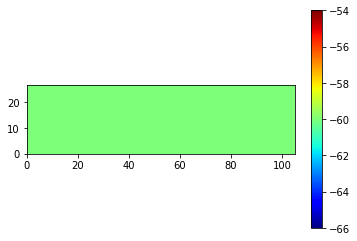

In [59]:
#df_total = pd.read_csv('./zone_result/zone_predict_total.csv')  
#print(df_total)
df_total_sort = zone_predict_total_pd.sort_values(by=['y','x'])
#print (df_total_sort)
rsrp_map_frompd = df_total_sort.values
print (rsrp_map_frompd)
np.savetxt('./result_rsrp/rsrp_map_frompd.csv', rsrp_map_frompd, delimiter=',', fmt='%f')
for i in range(len(rsrp_map_frompd)):
    if rsrp_map_frompd[i,3]>=-60:
        rsrp_map_frompd[i,3] = -60
    if rsrp_map_frompd[i,3]<=-130:
        rsrp_map_frompd[i,3] = -130
print (rsrp_map_frompd)
print (len(rsrp_map_frompd))
rsrp_map_pd = (rsrp_map_frompd[:,3]).reshape(27, 105)
img = plt.imread("./pic/51_5F-3.png")
plt.imshow(img, zorder=0, extent=[0, map_size[0], 0, map_size[1]])
heatmap_rsrp = plt.pcolor(rsrp_map_pd,cmap='jet',alpha=1)
plt.savefig('./result_rsrp/rsrp_map.png')
plt.colorbar()


Merge to 51-5F map
===

In [97]:
#bk = Image.open('5f_map.png')
bk = Image.open('./pic/823.PNG')
print (bk.size)
heatmap_rsrp = Image.open('./result_rsrp/rsrp_map.png')
print (heatmap_rsrp.size)
#heatmap_rsrp = heatmap_rsrp.resize((501, 130))
bk = bk.resize((432, 288))
heatmap_rsrp = heatmap_rsrp.resize((432, 288))
#bk = bk.resize((640, 480))
blended = Image.blend(heatmap_rsrp, bk, alpha=0.1)
blended.save('./result_rsrp/zone_rsrp.png')

(623, 411)
(640, 480)


In [ ]:
###choice K    
'''    for K in range(25):
        K_value = K+1
        model = KNeighborsRegressor(n_neighbors = K_value, weights='uniform', algorithm='auto')
        model.fit(X_train, y_train) 
        y_pred = model.predict(X_test)
        accuracy = model.score(X_test, y_test)
        print ("k==",K,"Accuracy is == ", accuracy)
'''
###choice K 

In [132]:
start = time.time()
end = time.time()
elapsed = end - start
print ("Time taken: ", elapsed, "seconds.")

Time taken:  2.0503997802734375e-05 seconds.


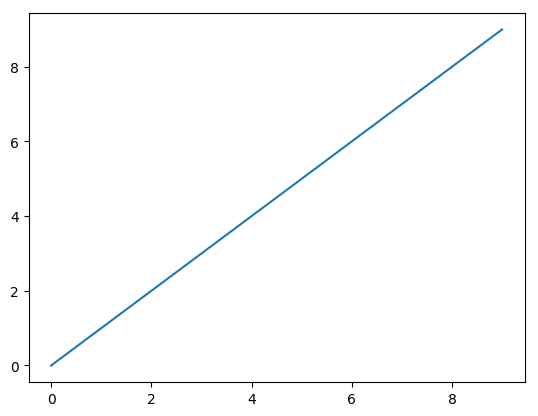

In [83]:

#plt.rcParams.update(plt.rcParamsDefault)
#inline_rc = dict(plt.rcParams)

#plt.plot(range(10))


In [104]:
#bk = Image.open('5f_map.png')
bk = Image.open('./pic/823.PNG')
print (bk.size)
heatmap_rsrp = Image.open('./pic/1.png')
print (heatmap_rsrp.size)
#heatmap_rsrp = heatmap_rsrp.resize((501, 130))
#bk = bk.resize((432, 288))
heatmap_rsrp = heatmap_rsrp.resize((623, 411))
#bk = bk.resize((640, 480))
blended = Image.blend(heatmap_rsrp, bk, alpha=0.1)
blended.save('raw.png')

(623, 411)
(614, 265)


Back code
===

In [ ]:
#title = "Learning Curves (KNN)"
    #plot_learning_curve(model, title, X, y, ylim=(0.1, 1.01))
    #plt.show()
    #train_scores, valid_scores = validation_curve(Ridge(), X_train, y_train, "alpha",
    #                                              np.logspace(-7, 3, 3))
    #print("train_scores==",train_scores)
    #print("valid_scores==",valid_scores)
    #train_scores_mean = np.mean(train_scores, axis=1)
    #valid_scores_mean = np.mean(valid_scores, axis=1)
    #print("train_scores_mean==",train_scores_mean)
    #print("valid_scores_mean==",valid_scores_mean)
    #train_sizes, train_scores, valid_scores = learning_curve(model, X, y,train_sizes=np.linspace(.1, 1.0, 5), cv=5)
    #print("train_scores==",train_scores)
    #print("valid_scores==",valid_scores)
    #plot_learning_curve(model, title, X, y, ylim=(0.1, 1.01),cv=cv)
    #(a,b)=X.shape
    #print(a)
    #print(b)
    #plot_learning_curve(model, title, X, y)
    #plt.show()
    #scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    #print(scores)
    #print(scores.mean())
    '''
    if i==4:
        print("4")
        model = KNeighborsRegressor(n_neighbors=3,weights='distance')
    #model = MLPRegressor(solver='lbfgs', alpha=1e-5,
    #                     hidden_layer_sizes=(30,), random_state=1) 
    #model = KNeighborsRegressor(n_neighbors=3)
        model.fit(X_train, y_train)
    elif i==3:
        print("3")
        model = MLPRegressor(solver='lbfgs', alpha=1e-5,
                             hidden_layer_sizes=(30,), random_state=1) 
        model.fit(X_train, y_train)
    else:
        model = KNeighborsRegressor(n_neighbors=3,weights='distance')
        model.fit(X_train, y_train)
    '''

In [219]:
from sklearn.decomposition import DictionaryLearning
X = train_part_test[:,0:3]
y = train_part_test[:,3]
#print(X)
#print(y)
dct=DictionaryLearning(n_components=5)
dct.fit(X)
X_sparse = dct.transform(X)
print('components is:\n',dct.components_)
#print('after transform:\n',dct.transform(X))
print(type(X_sparse))
print(X_sparse)

components is:
 [[-0.86653434 -0.16985973 -0.46932494]
 [ 0.74830313  0.34251501  0.56808969]
 [-0.9089061  -0.20697463 -0.36200996]
 [-0.80365187 -0.02079332 -0.59473634]
 [ 0.9098468   0.03379493  0.41356585]]
<class 'numpy.ndarray'>
[[ -78.39979061    0.            0.            0.            0.        ]
 [ -94.22214839    0.            0.            0.            0.        ]
 [ -93.7125692     0.            0.            0.            0.        ]
 [ -79.79313983    0.            0.            0.            0.        ]
 [ -95.08868274    0.            0.            0.            0.        ]
 [ -94.56186785    0.            0.            0.            0.        ]
 [ -90.24643182    0.            0.            0.            0.        ]
 [   0.            0.         -111.63838346    0.            0.        ]
 [ -94.57910354    0.            0.            0.            0.        ]
 [ -76.66672192    0.            0.            0.            0.        ]
 [ -91.97950051    0.            0

In [220]:
#print(train_part_test)
train_part_test_del = np.delete(train_part_test, 0, axis=1)
train_part_test_del = np.delete(train_part_test_del, 0, axis=1)
#print(train_part_test_del)
X_sparse_total = np.concatenate((X_sparse,train_part_test_del), axis=1)
#print(X_sparse_total)
np.savetxt("./zone_result/X_sparse_total.csv",X_sparse_total, delimiter=',', fmt='%f')